In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cmocean as cm
import pandas as pd
import cftime
from dask.distributed import Client

In [2]:
## To implement, use:
client = Client(n_workers=24)
client

Client Scheduler: tcp://127.0.0.1:41775 Dashboard: /proxy/8787/status,Cluster Workers: 24 Cores: 48 Memory: 188.57 GiB


In [3]:
session = cc.database.create_session()

In [7]:
# This is for something like P16 - but only tropics and subtropics
transect_lon = -150
transect_lats = [-40,40]

KELVIN_TO_CELSIUS = -273.15

In [6]:
# Load original GMD experiment
expt = '01deg_jra55v13_iaf'
## 25 year average
tstart = pd.to_datetime('1993', format='%Y')
tend = tstart + pd.DateOffset(years=25)
temp = cc.querying.getvar(expt, 'temp', session, ncfile='ocean.nc',chunks={'st_ocean': None,'xt_ocean':5})
temperature = temp.sel(xt_ocean=transect_lon,method='nearest').sel(time=slice(tstart,tend)).mean('time').load() + KELVIN_TO_CELSIUS

In [8]:
# Load obs
ds_obs = xr.open_mfdataset('/g/data/ik11/observations/woa13/01/woa13_ts_??_mom01.nc',chunks={'ZT': None,'GRID_X_T':5})
ds_obs = ds_obs.rename({'GRID_Y_T': 'yt_ocean', 'GRID_X_T': 'xt_ocean', 'ZT': 'st_ocean'})
ds_obs['st_ocean'] = temp.st_ocean
ds_obs['xt_ocean'] = temp.xt_ocean
ds_obs['yt_ocean'] = temp.yt_ocean
ds_obs = ds_obs.mean('time')
temperature_obs = ds_obs.temp.sel(xt_ocean=transect_lon,method='nearest').load()

Text(0.5, 1.0, 'P16 Temp Bias: 01deg_jra55v13_iaf')

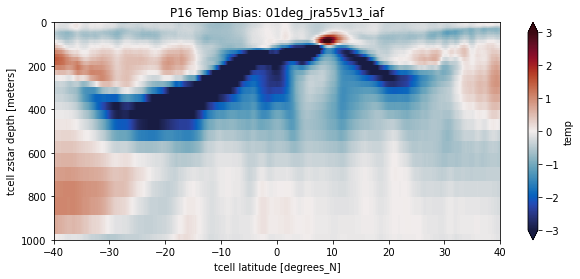

In [9]:
plt.figure(figsize=(10,4))
temp_bias = temperature - temperature_obs
temp_bias.plot(yincrease=False,vmin=-3, vmax=3,cmap = cm.cm.balance)
plt.xlim(transect_lats)
plt.ylim(ymin=1000)
plt.title('P16 Temp Bias: '+expt)

Text(0.5, 1.0, 'P16 Temp Bias: 01deg_jra55v13_ryf9091')

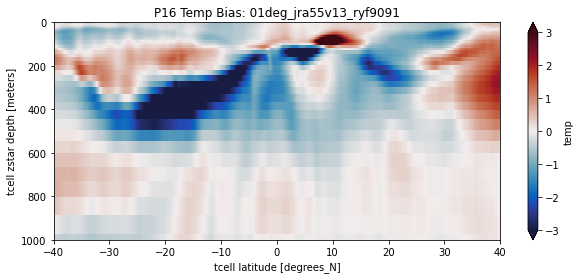

In [51]:
# Load RYF spinup
expt = '01deg_jra55v13_ryf9091'
tstart = '2050-01-01'
tend = '2070-01-01'
temp = cc.querying.getvar(expt, 'temp', session, ncfile='ocean.nc',chunks={'st_ocean': None,'xt_ocean':5})
temperature = temp.sel(xt_ocean=transect_lon,method='nearest').sel(time=slice(tstart,tend)).mean('time').load() + KELVIN_TO_CELSIUS

plt.figure(figsize=(10,4))
temp_bias = temperature - temperature_obs
temp_bias.plot(yincrease=False,vmin=-3, vmax=3,cmap = cm.cm.balance)
plt.xlim(transect_lats)
plt.ylim(ymin=1000)
plt.title('P16 Temp Bias: '+expt)

Text(0.5, 1.0, 'P16 Temp Bias: 01deg_jra55v13_ryf9091_5Kv')

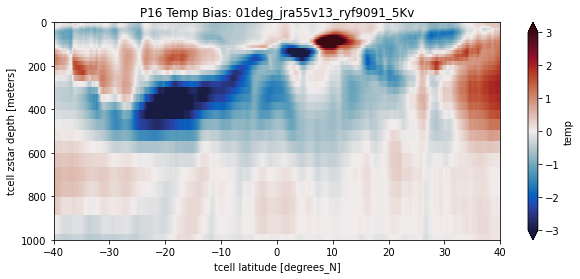

In [53]:
# Load RYF 5Kv case
expt = '01deg_jra55v13_ryf9091_5Kv'
tstart = '2069-01-01'
tend = '2069-12-31'
temp = cc.querying.getvar(expt, 'temp', session, ncfile='ocean.nc',chunks={'st_ocean': None,'xt_ocean':5})
temperature = temp.sel(xt_ocean=transect_lon,method='nearest').sel(time=slice(tstart,tend)).mean('time').load() + KELVIN_TO_CELSIUS

plt.figure(figsize=(10,4))
temp_bias = temperature - temperature_obs
temp_bias.plot(yincrease=False,vmin=-3, vmax=3,cmap = cm.cm.balance)
plt.xlim(transect_lats)
plt.ylim(ymin=1000)
plt.title('P16 Temp Bias: '+expt)

Text(0.5, 1.0, 'P16 Temp Bias: 01deg_jra55v13_ryf9091_k_smag_iso3')

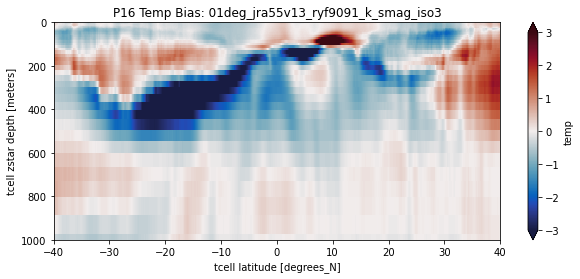

In [56]:
# Load RYF k_smag_iso3 case
expt = '01deg_jra55v13_ryf9091_k_smag_iso3'
tstart = '2061-01-01'
tend = '2061-12-31'
temp = cc.querying.getvar(expt, 'temp', session, ncfile='ocean.nc',chunks={'st_ocean': None,'xt_ocean':5})
temperature = temp.sel(xt_ocean=transect_lon,method='nearest').sel(time=slice(tstart,tend)).mean('time').load() + KELVIN_TO_CELSIUS

plt.figure(figsize=(10,4))
temp_bias = temperature - temperature_obs
temp_bias.plot(yincrease=False,vmin=-3, vmax=3,cmap = cm.cm.balance)
plt.xlim(transect_lats)
plt.ylim(ymin=1000)
plt.title('P16 Temp Bias: '+expt)

Text(0.5, 1.0, 'P16 Temp Bias: 01deg_jra55v13_ryf9091_OFAM3visc')

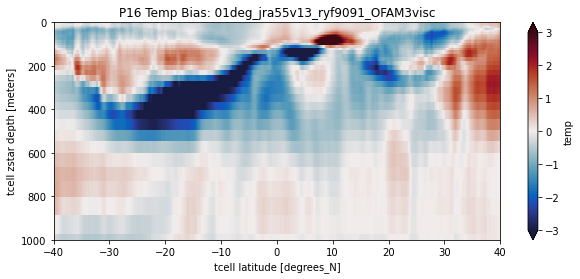

In [19]:
# Load RYF OFAM3visc case
expt = '01deg_jra55v13_ryf9091_OFAM3visc'
tstart = '2060-01-01'
tend = '2060-12-31'
temp = cc.querying.getvar(expt, 'temp', session, ncfile='ocean.nc',chunks={'st_ocean': None,'xt_ocean':5})
temperature = temp.sel(xt_ocean=transect_lon,method='nearest').sel(time=slice(tstart,tend)).mean('time').load() + KELVIN_TO_CELSIUS

plt.figure(figsize=(10,4))
temp_bias = temperature - temperature_obs
temp_bias.plot(yincrease=False,vmin=-3, vmax=3,cmap = cm.cm.balance)
plt.xlim(transect_lats)
plt.ylim(ymin=1000)
plt.title('P16 Temp Bias: '+expt)

In [33]:
# Load New IAF
expt = '01deg_jra55v140_iaf'
tstart = '1993-01-01'
tend = '2017-12-31'
temp = cc.querying.getvar(expt, 'temp', session, ncfile='ocean-3d-temp-1-monthly-mean-ym_%.nc',chunks={'st_ocean': None,'xt_ocean':5})
temperature = temp.sel(xt_ocean=transect_lon,method='nearest').sel(time=slice(tstart,tend)).mean('time').load() + KELVIN_TO_CELSIUS

In [29]:
# Load obs again -- for some reason new IAF runs have a slightly different vertical coordinate??
ds_obs = xr.open_mfdataset('/g/data/ik11/observations/woa13/01/woa13_ts_??_mom01.nc',chunks={'ZT': None,'GRID_X_T':5})
ds_obs = ds_obs.rename({'GRID_Y_T': 'yt_ocean', 'GRID_X_T': 'xt_ocean', 'ZT': 'st_ocean'})
ds_obs['st_ocean'] = temp.st_ocean
ds_obs['xt_ocean'] = temp.xt_ocean
ds_obs['yt_ocean'] = temp.yt_ocean
ds_obs = ds_obs.mean('time')
temperature_obs = ds_obs.temp.sel(xt_ocean=transect_lon,method='nearest').load()

Text(0.5, 1.0, 'P16 Temp Bias: 01deg_jra55v140_iaf')

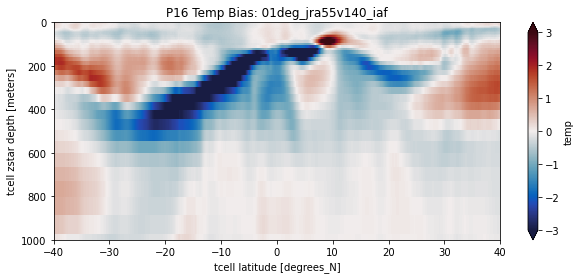

In [34]:
plt.figure(figsize=(10,4))
temp_bias = temperature-temperature_obs
temp_bias.plot(yincrease=False,vmin=-3, vmax=3,cmap = cm.cm.balance)
plt.xlim(transect_lats)
plt.ylim(ymin=1000)
plt.title('P16 Temp Bias: '+expt)

Text(0.5, 1.0, 'P16 Temp Bias: 01deg_jra55v140_iaf_cycle2')

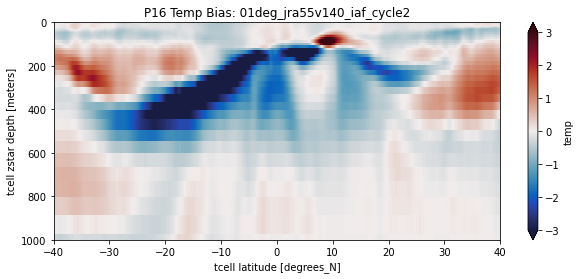

In [32]:
# Load New IAF cycle 2
expt = '01deg_jra55v140_iaf_cycle2'
tstart = '1993-01-01'
tend = '2017-12-31'
temp = cc.querying.getvar(expt, 'temp', session, ncfile='ocean-3d-temp-1-monthly-mean-ym_%.nc',chunks={'st_ocean': None,'xt_ocean':5})
temperature = temp.sel(xt_ocean=transect_lon,method='nearest').sel(time=slice(tstart,tend)).mean('time').load() + KELVIN_TO_CELSIUS

plt.figure(figsize=(10,4))
temp_bias = temperature - temperature_obs
temp_bias.plot(yincrease=False,vmin=-3, vmax=3,cmap = cm.cm.balance)
plt.xlim(transect_lats)
plt.ylim(ymin=1000)
plt.title('P16 Temp Bias: '+expt)